In [52]:
import pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [53]:
df = pd.read_csv('data/df.csv')

In [54]:
df

,posted,miles,origin,dest,weight,shipper,time
0,10:06,"1,440","Los Angeles,CA","Dallas,TX","25,000","Total Quality Logistics Inc, Milford, OH",70
1,11:04,"1,423","City Of Indus,CA","Dallas,TX","43,900","Fremont Contract Carriers, Fremont, NE",80
2,11:08,"1,357","Vista,CA","Ft Worth,TX","25,000","Landstar Ranger Inc, San Antonio, TX",90
3,11:09,"1,462","Shafter,CA","Grand Prairie,TX","45,000","Uber Freight Llc, Chicago, IL",110
4,11:33,"1,380","San Diego,CA","Allen,TX","40,000","CH Robinson Company, Overland Park, KS",120
5,11:35,"1,406","City Of Indus,CA","Roanoke,TX","10,000","Arnold Transportation Services Inc, Grand Prai...",130
6,11:48,"1,362","San Diego,CA","Dallas,TX","14,000","Tristar Transit Inc, Sylmar, CA",140
7,13:39,"1,419","Vernon,CA","Hurst,TX","20,000","All State Association Inc, San Fernando, CA",150
8,13:41,"1,435","Santa Fe Spgs,CA","Dallas,TX","16,000","Total Quality Logistics Inc, Milford, OH",60
9,13:45,"1,428","Buena Park,CA","Dallas,TX","9,200","Sure Shot Logistics, Huntington Woods, MI",130


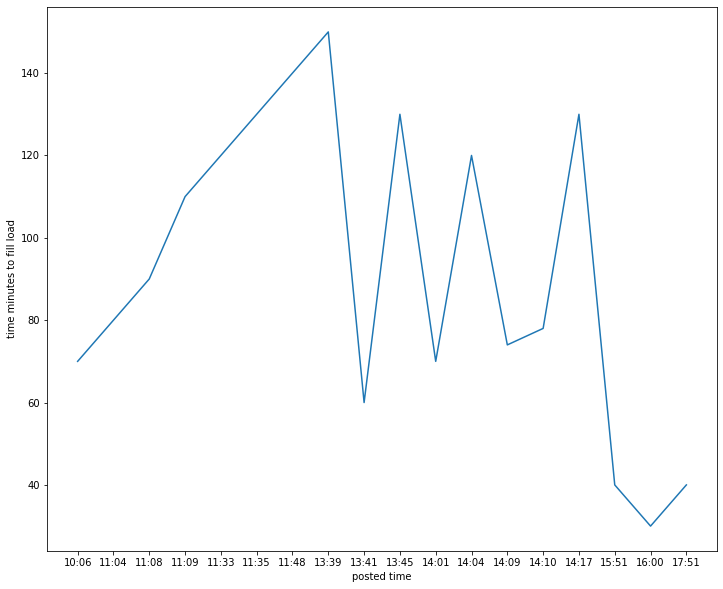

In [11]:
plt.figure(figsize=(12,10))
plt.plot(df['posted'], df['time'])
plt.xlabel('posted time')
plt.ylabel('time minutes to fill load');

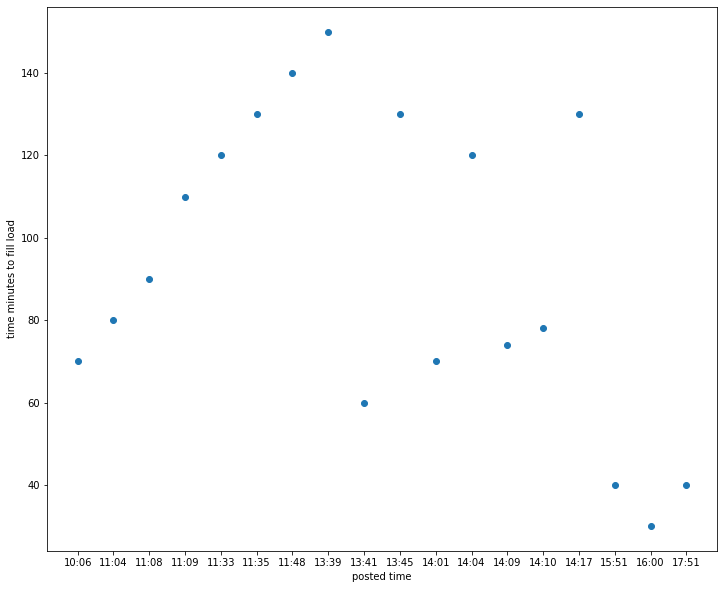

In [13]:
plt.figure(figsize=(12,10))
plt.xlabel('posted time')
plt.ylabel('time minutes to fill load')
plt.plot(df['posted'], df['time'], 'o');

In [55]:
def fraction(row):
    x = row['posted']
    hr = float(x[0:2])
    mi = float(x[3:5])
    return hr + mi/60

In [56]:
df['posted'] = df.apply(fraction, axis=1)

In [57]:
df['miles'] = df['miles'].str.replace(',', '').astype(int)
df['weight'] = df['weight'].str.replace(',', '').astype(int)
df.head()

,posted,miles,origin,dest,weight,shipper,time
0,10.100000,1440,"Los Angeles,CA","Dallas,TX",25000,"Total Quality Logistics Inc, Milford, OH",70
1,11.066667,1423,"City Of Indus,CA","Dallas,TX",43900,"Fremont Contract Carriers, Fremont, NE",80
2,11.133333,1357,"Vista,CA","Ft Worth,TX",25000,"Landstar Ranger Inc, San Antonio, TX",90
3,11.150000,1462,"Shafter,CA","Grand Prairie,TX",45000,"Uber Freight Llc, Chicago, IL",110
4,11.550000,1380,"San Diego,CA","Allen,TX",40000,"CH Robinson Company, Overland Park, KS",120


In [40]:
df.head()

,posted,miles,origin,dest,weight,shipper,time
0,10.100000,"1,440","Los Angeles,CA","Dallas,TX","25,000","Total Quality Logistics Inc, Milford, OH",70
1,11.066667,"1,423","City Of Indus,CA","Dallas,TX","43,900","Fremont Contract Carriers, Fremont, NE",80
2,11.133333,"1,357","Vista,CA","Ft Worth,TX","25,000","Landstar Ranger Inc, San Antonio, TX",90
3,11.150000,"1,462","Shafter,CA","Grand Prairie,TX","45,000","Uber Freight Llc, Chicago, IL",110
4,11.550000,"1,380","San Diego,CA","Allen,TX",—,"CH Robinson Company, Overland Park, KS",120


In [58]:
X = df[['posted', 'miles', 'weight']]
y = df['time']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
pred = lr.predict(Xtest)
lr.score(Xtrain, ytrain)

0.41920539237699617

In [59]:
lr.score(Xtest, ytest)

-0.4472328247416919

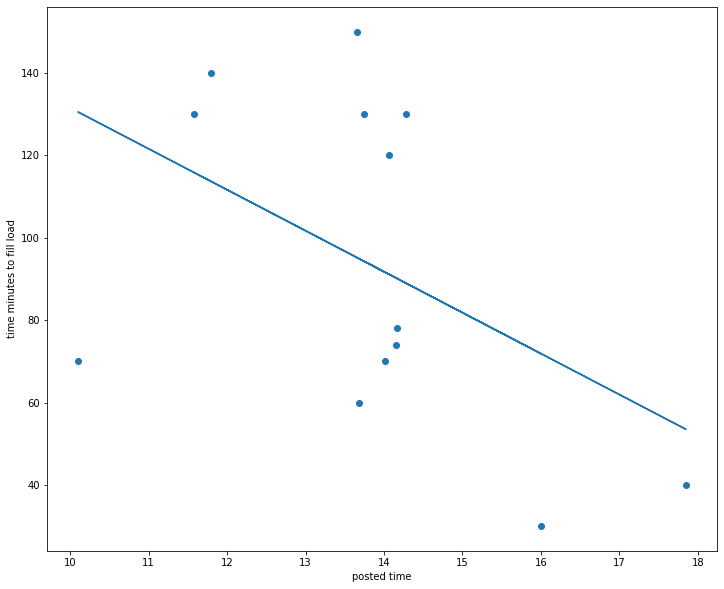

In [46]:
plt.figure(figsize=(12,10))
plt.xlabel('posted time')
plt.ylabel('time minutes to fill load')
plt.scatter(Xtrain, ytrain)
plt.plot(Xtrain, lr.predict(Xtrain));